# General Binning function

In [2]:
import pandas as pd 
import numpy as np 
from astropy import table
from scipy import stats
import matplotlib.pyplot as plt
from astropy import table
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
from scipy.optimize import curve_fit
import time
from scipy.interpolate import interp1d


start = time.time()


#This should be modified to be used with every template

#User inputs
SN = np.loadtxt("sne/Ia/sn1989b.m07.dat")
lams = SN[:,0]
fluxs = SN[:,1]
#In angstroms
resolution = 20


def bin_spectra(spectrum, resolution):
    
   
    number_of_bins = np.math.floor((lams[-1]-lams[0]) / resolution ) 
    flux_bin, bin_edge, index = scipy.stats.binned_statistic(lams, fluxs, statistic='mean', bins = number_of_bins)
    
    #Takes the mean of the edges of the bin in order to plot the binned spectrum
    bin_wavelength = [ (bin_edge[i]+ bin_edge[i+1])/2 for i in range(len(bin_edge)-1) ]
    
    
    #Make a table with the     
    bin_spectra = table.Table()
    bin_spectra['lam_bin'] = bin_wavelength
    bin_spectra['bin_flux'] = flux_bin
    
    bin_wavelength = np.array(bin_wavelength)
    flux_bin   = np.array(flux_bin)
    
    print('the spectra is binned for a resolution of', resolution)
    return bin_spectra


end = time.time()
print(end - start)



0.037677764892578125


# Bins and combines SN + HG

In [35]:
import numpy as np 
from astropy import table
from scipy import stats
import scipy
import matplotlib.pyplot as plt
from scipy import *


SN = np.loadtxt("sne/Ia/sn2003du.m11.dat")
lams = SN[:,0]
fluxs = SN[:,1]

#In angstroms
resolution = 20
#print('the spectra is binned for a resolution of', resolution)

number_of_bins = np.math.floor((lams[-1]-lams[0]) / resolution ) 
flux_bin_SN, bin_edge, index = scipy.stats.binned_statistic(lams, fluxs, statistic='mean', bins = number_of_bins)

#Takes the mean of the edges of the bin in order to plot the binned spectrum
bin_wavelength = [ (bin_edge[i]+ bin_edge[i+1])/2 for i in range(len(bin_edge)-1) ]


#Make a table with the     
bin_spectra = table.Table()
bin_spectra['lam_bin_SN'] = bin_wavelength
bin_spectra['bin_flux_SN'] = flux_bin_SN

bin_wavelength = np.array(bin_wavelength)
flux_bin_SN   = np.array(flux_bin_SN)

   
#print(bin_spectra)


GT = np.loadtxt("/Users/user/Desktop/ssf/gal/Sb")
lamgt = GT[:,0]
fluxgt = GT[:,1]


number_of_binsHG = np.math.floor((lamgt[-1]-lamgt[0]) / resolution ) 
flux_bin_HG, bin_edge, index = scipy.stats.binned_statistic(lamgt, fluxgt, statistic='mean', bins = number_of_bins)
#
bin_wavelengthHG = [ (bin_edge[i]+ bin_edge[i+1])/2 for i in range(len(bin_edge)-1) ]
#
bin_spectra_HG = table.Table()
bin_spectra_HG['lam_bin_HG'] = bin_wavelengthHG
bin_spectra_HG['flux_bin_HG'] = flux_bin_HG

bin_wavelengthHG = np.array(bin_wavelengthHG)
flux_bin_HG    = np.array(flux_bin_HG)

#print(bin_spectra_HG)


#Combining spectra

lam = bin_wavelength
flux= flux_bin_SN + flux_bin_HG


#How do I pair up the data file?
#Zipping it up 
#new_spectrum=zip(lam, flux)

## Plot

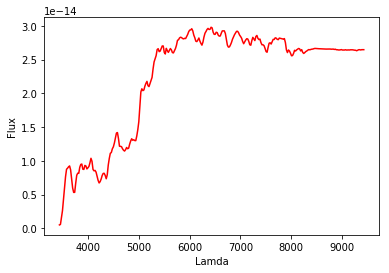

In [36]:
#Plot the data
#Must fix the nan issue

plt.plot(lam, flux,'r')

plt.ylabel('Flux')
plt.xlabel('Lamda')

plt.show()

# Make into a file

In [ ]:
import csv

with open('Binned_spectra_first.dat', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    
    writer.writerows(zip(lam,flux))